# Point Process Analysis Aggregation
A framework for evaluating the performance of centroid and proportional allocation approaches.

In [16]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import sys
import os
sys.path.insert(0, './src')

from src.aggregation_2d import *
from src.point_processes_2d import *
from src.simulation2d import *
from src.visualization import *
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

N = 500
dg = np.logspace(-3, -0.01, N)
dp = 0.5*np.ones(N)
ratio = dp / dg
rate = 20
x_range = (0,1)
y_range = (0,1)


# Empirical evaluation of homogeneous and non-homogeneous point process
Empirically compare proportional allocation and centroid allocation approaches under three forms of point process:
1. Homogeneous Poisson point process
2. Non-homogeneous Neyman Scott process
3. Non-homogeneous Log-Gaussian Cox process

### Generate samples from each type of point process

In [7]:
# Parameters for Poisson Process
N = rate

# Parameters for Neyman-Scott Process
lambda_p = 20
lambda_c = N / lambda_p
sigma = 0.05

# # Parameters for log-Gaussian Cox Process
# L = 1             # Length of domain
# dx = 0.05          # Bin width
# mean_log_intensity = np.log(N)  # Mean of log-intensity
# variance = 1     # Variance of the Gaussian Process
# length_scale = 0.05 # Length scale of covariance

sample_generator = {}
sample_generator['poisson'] = lambda rate, x_range, y_range: get_poisson_process_samples_2d(rate, x_range[0], x_range[1], y_range[0], y_range[1])
sample_generator['neyman-scott'] = lambda rate, x_range, y_range: get_neyman_scott_process_2d(lambda_p, rate / lambda_p, sigma, x_range[0], x_range[1], y_range[0], y_range[1])
sample_generator['lgcp'] = lambda rate, x_range, y_range: get_lgcp_2d(rate, x_range[0], x_range[1], y_range[0], y_range[1])

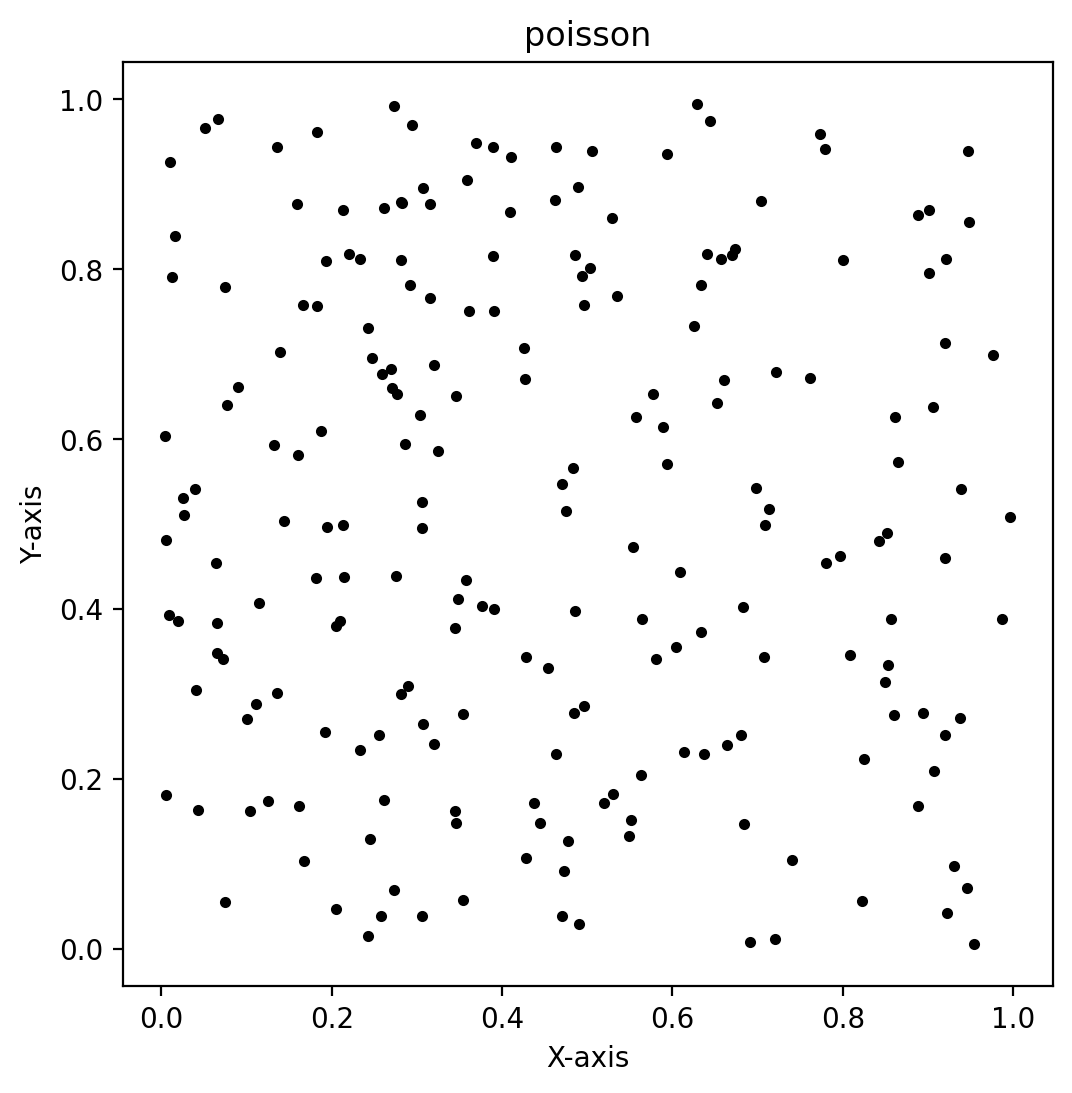

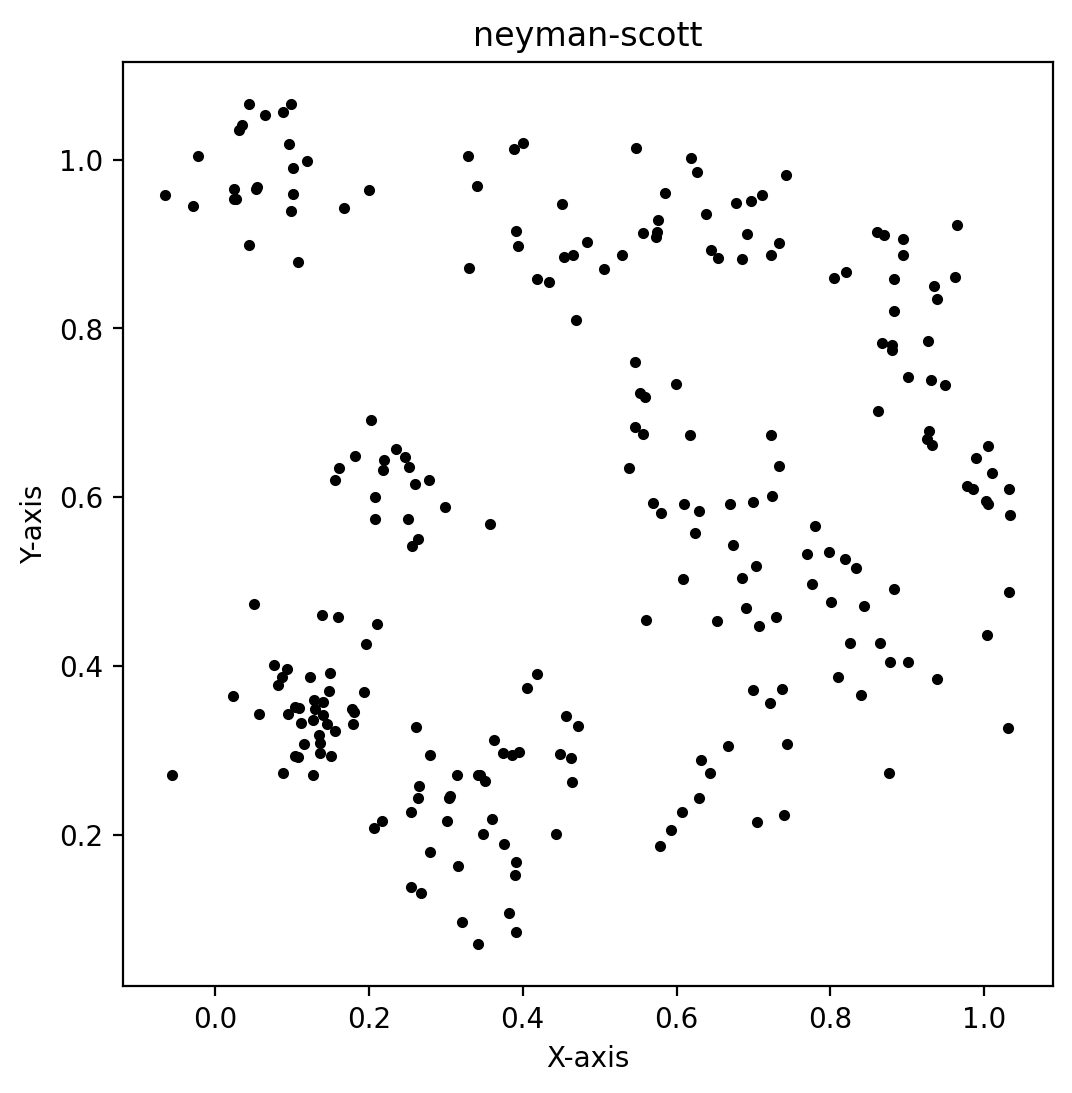

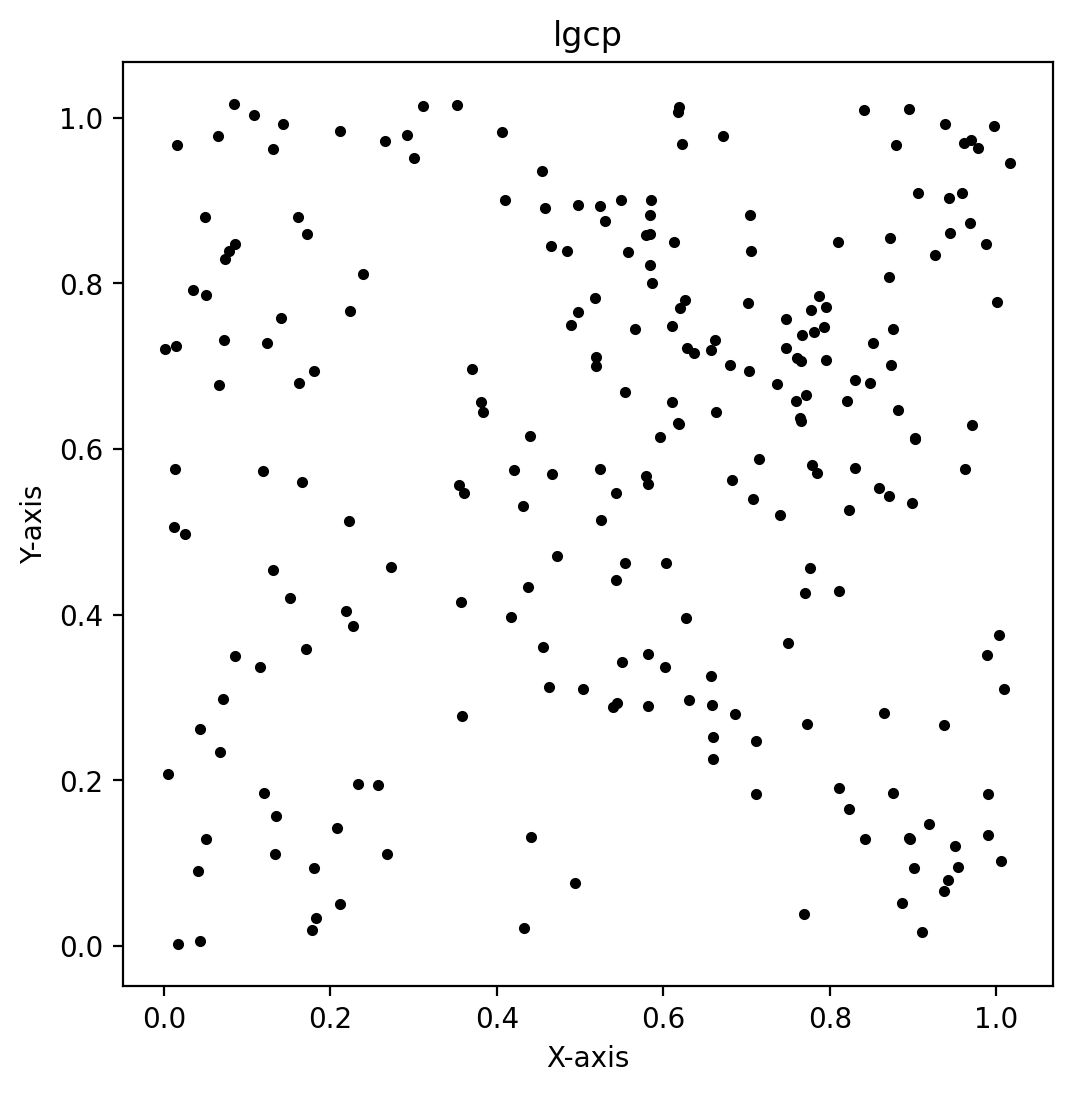

In [8]:
# Plot the samples
for key in sample_generator.keys():
    # Generate samples
    samples = sample_generator[key](rate, x_range, y_range)
    plot_two_d_samples(samples, key)


### Run the simulation for one of the point processes assuming the one edge is fixed at $x=0$

100%|██████████| 500/500 [00:23<00:00, 21.64it/s] 


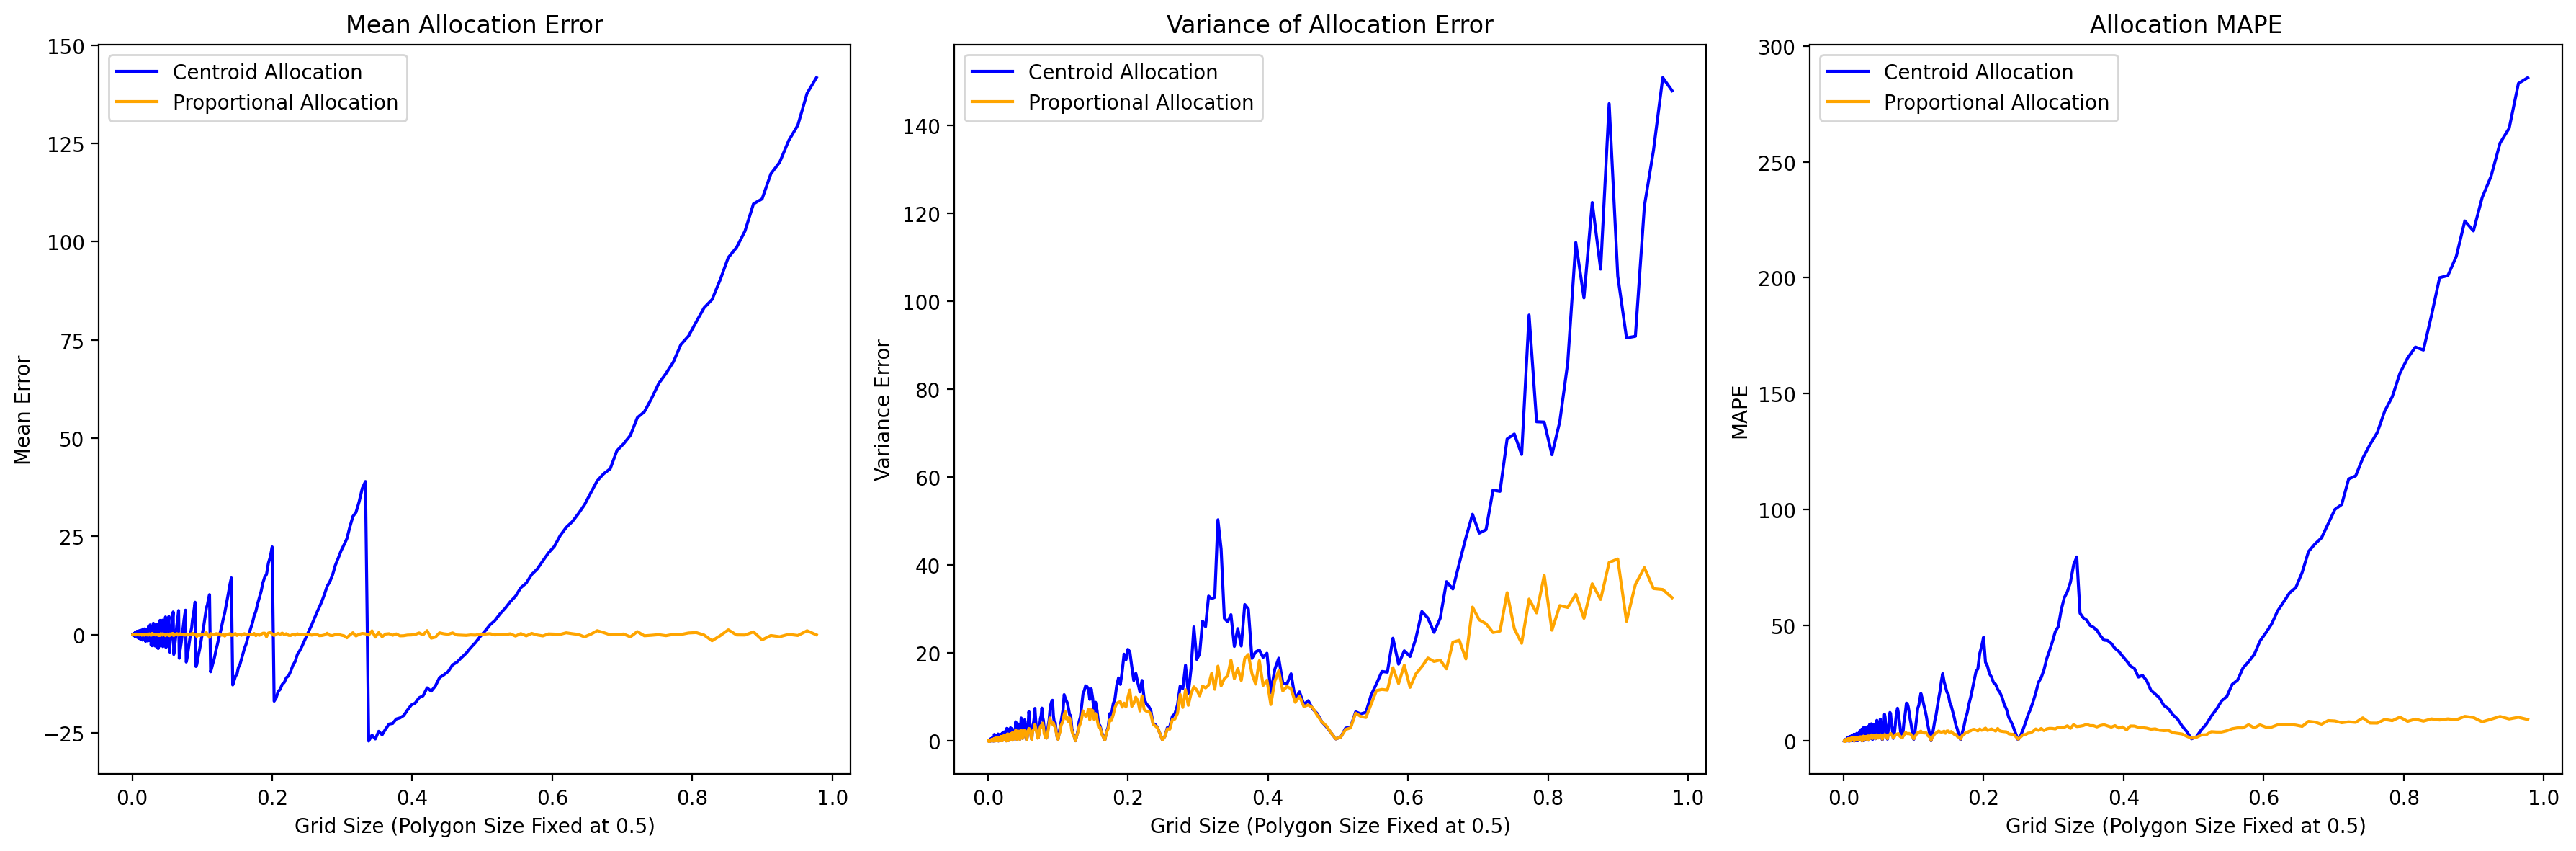

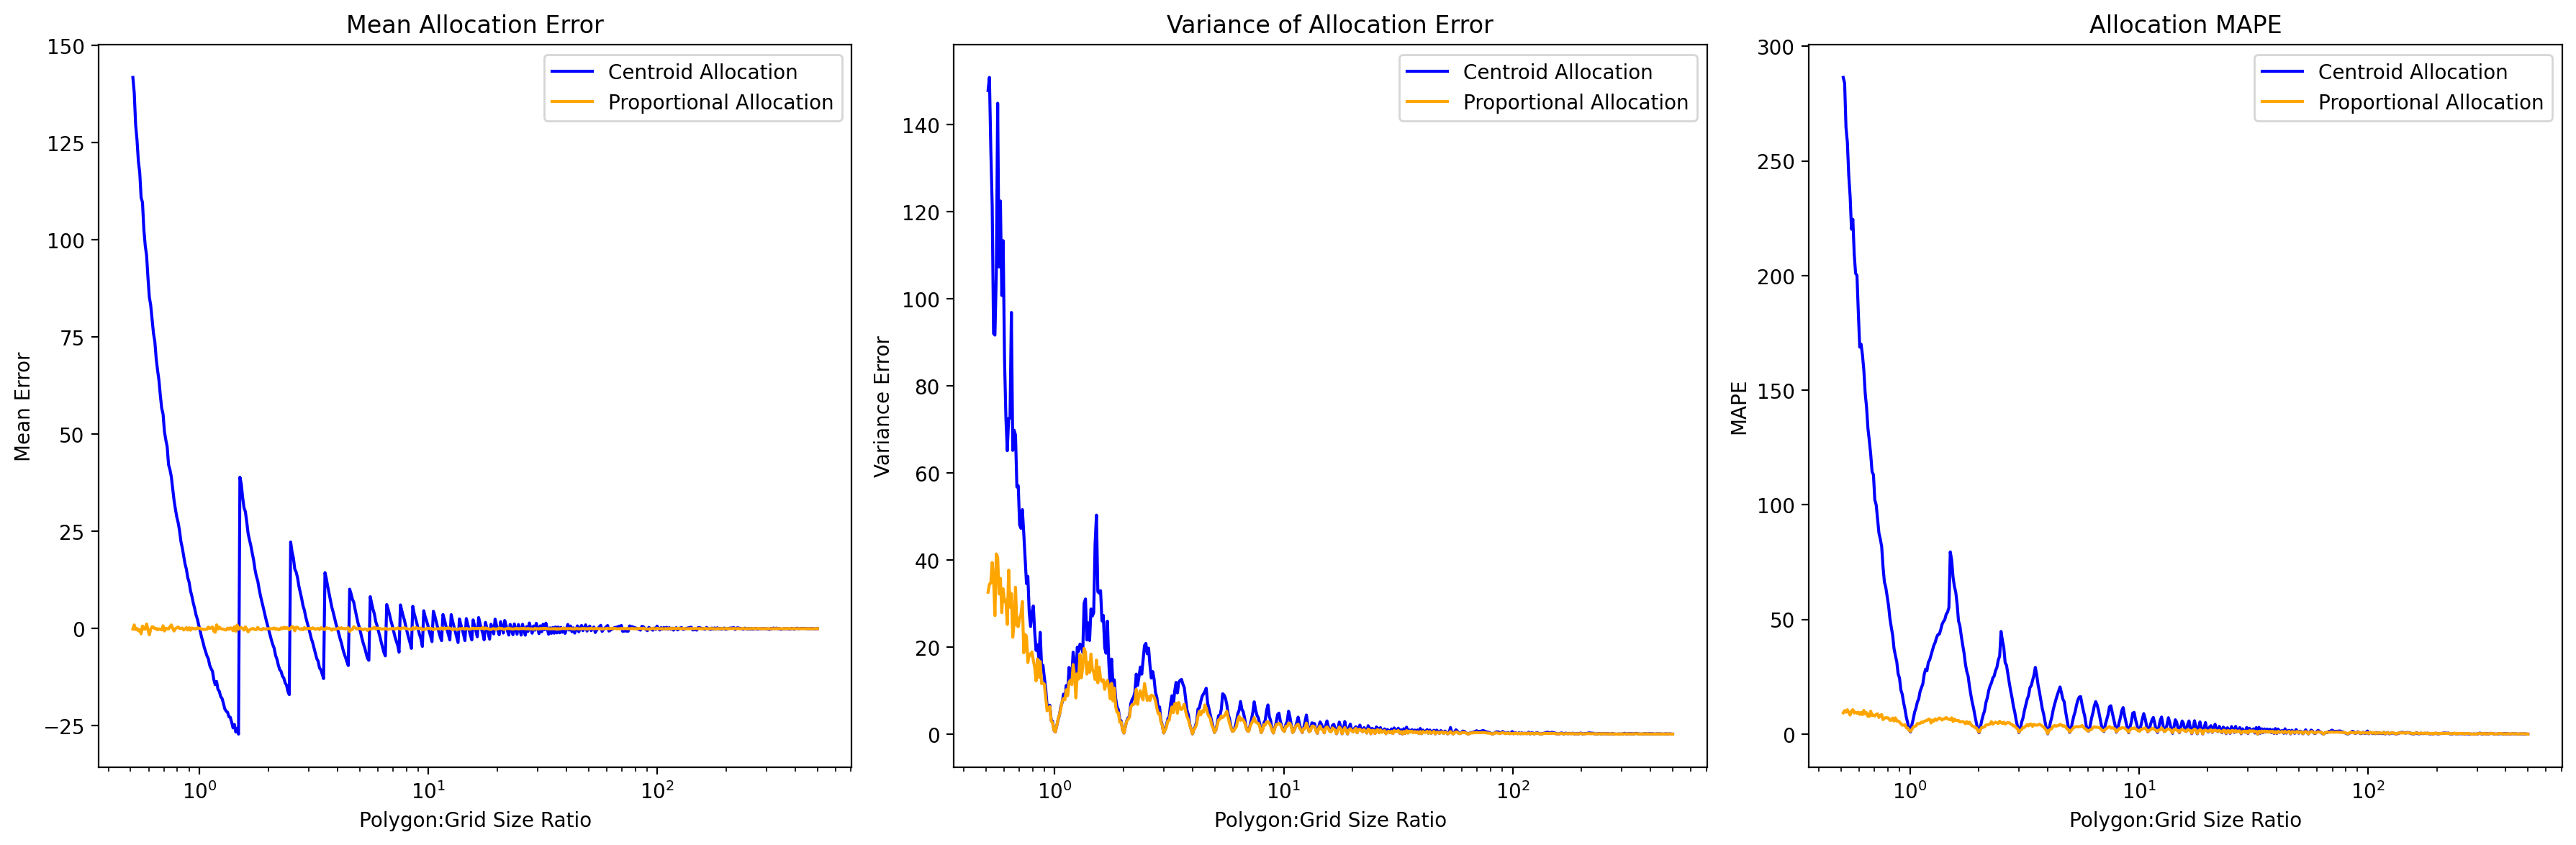

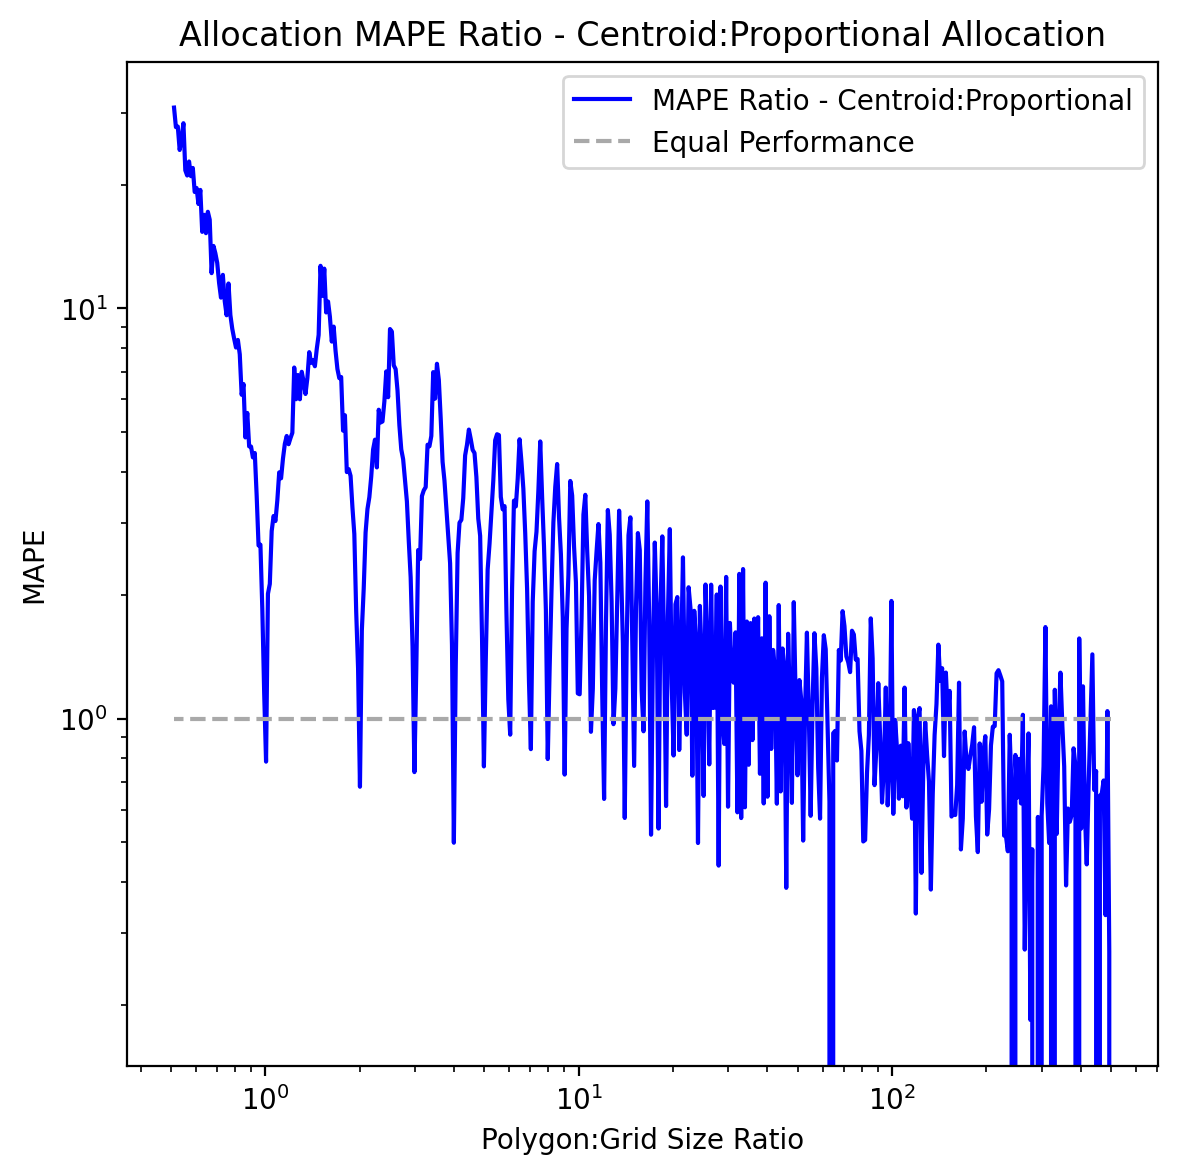

In [9]:
trials = 100
x_range = (0,1)
y_range = (0,1)
point_process = sample_generator['poisson']
results_fixed_polygon_start = run_simulation_fixed_edge_2d(rate, x_range, y_range, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_fixed_polygon_start)
plot_simulation_results_ratio(dg, dp, results_fixed_polygon_start)
plot_simulation_error_ratios(dg, dp, results_fixed_polygon_start)

### Run the simulation for one of the point processes randomly setting the edges

100%|██████████| 500/500 [01:10<00:00,  7.08it/s]


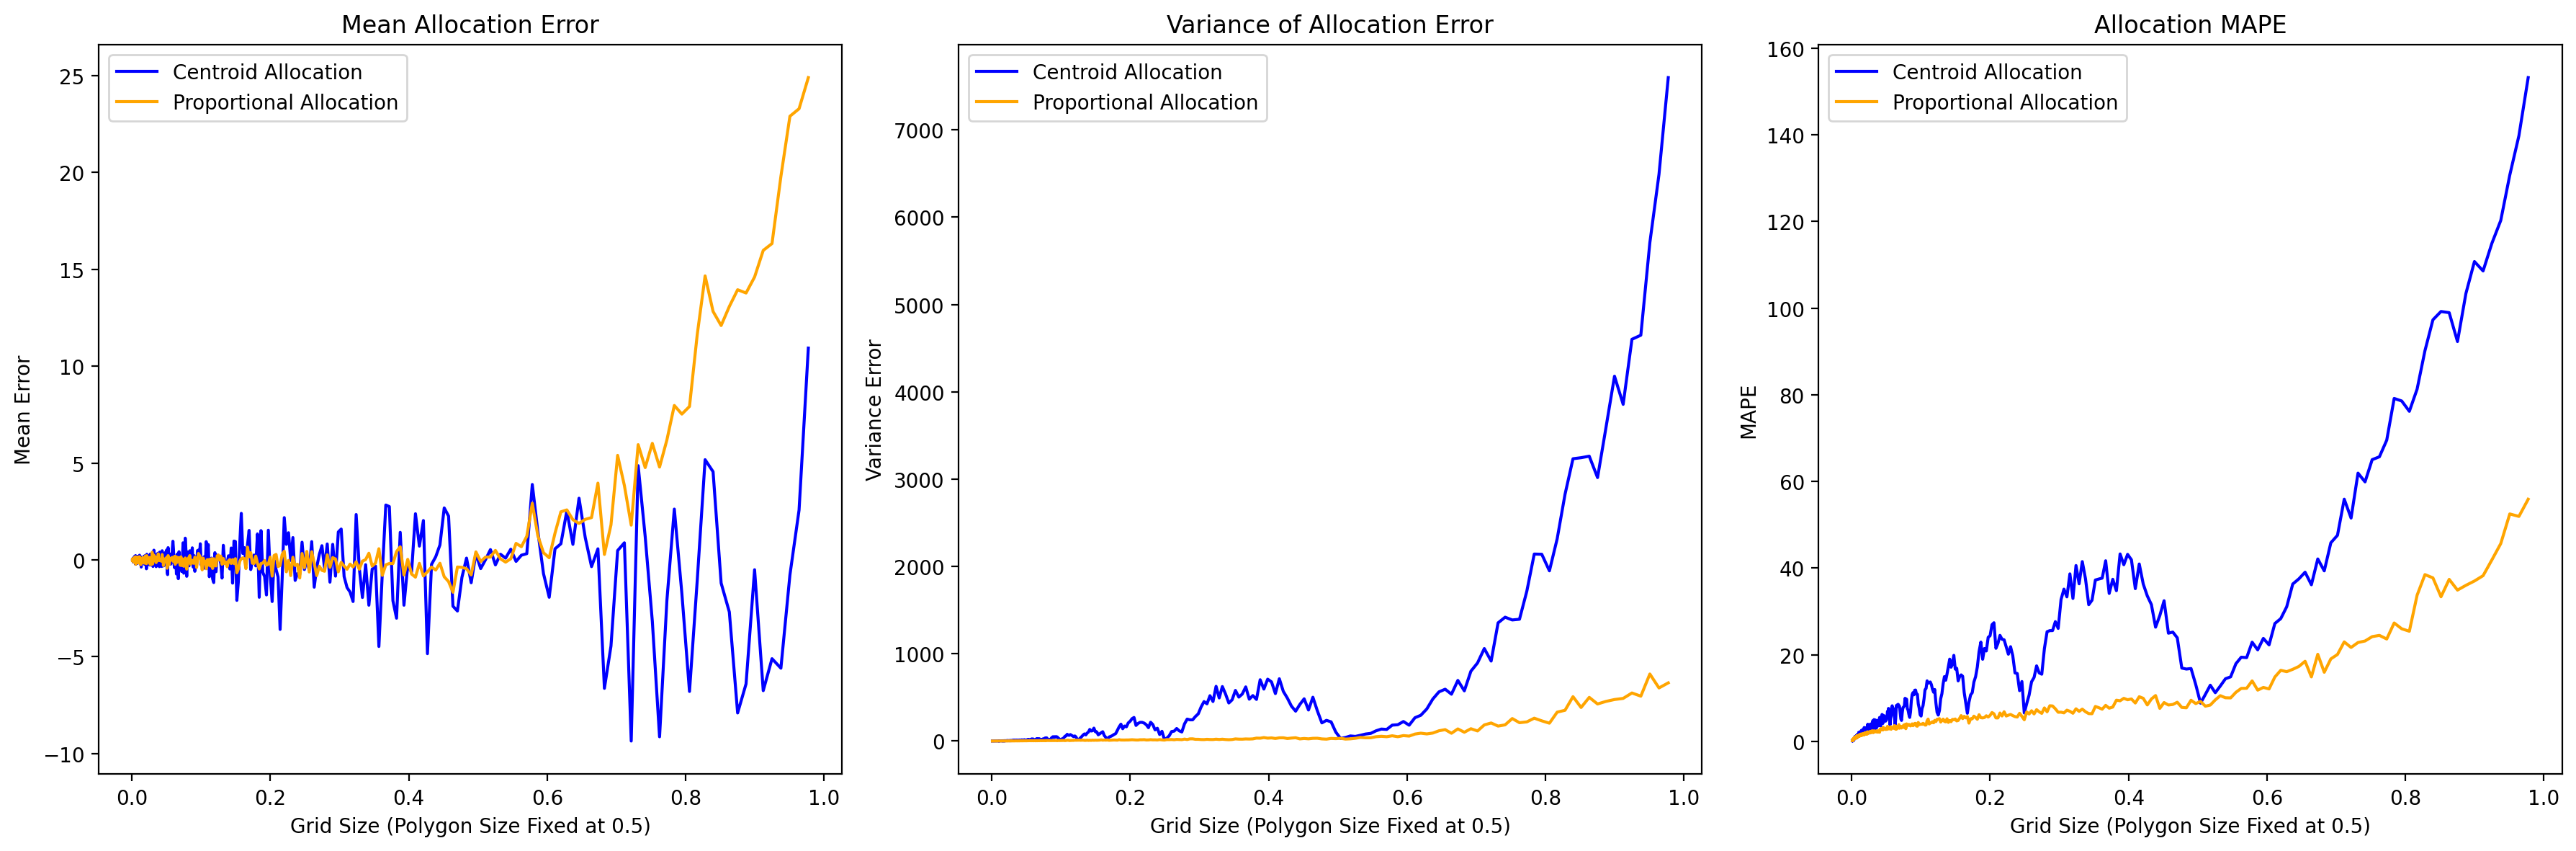

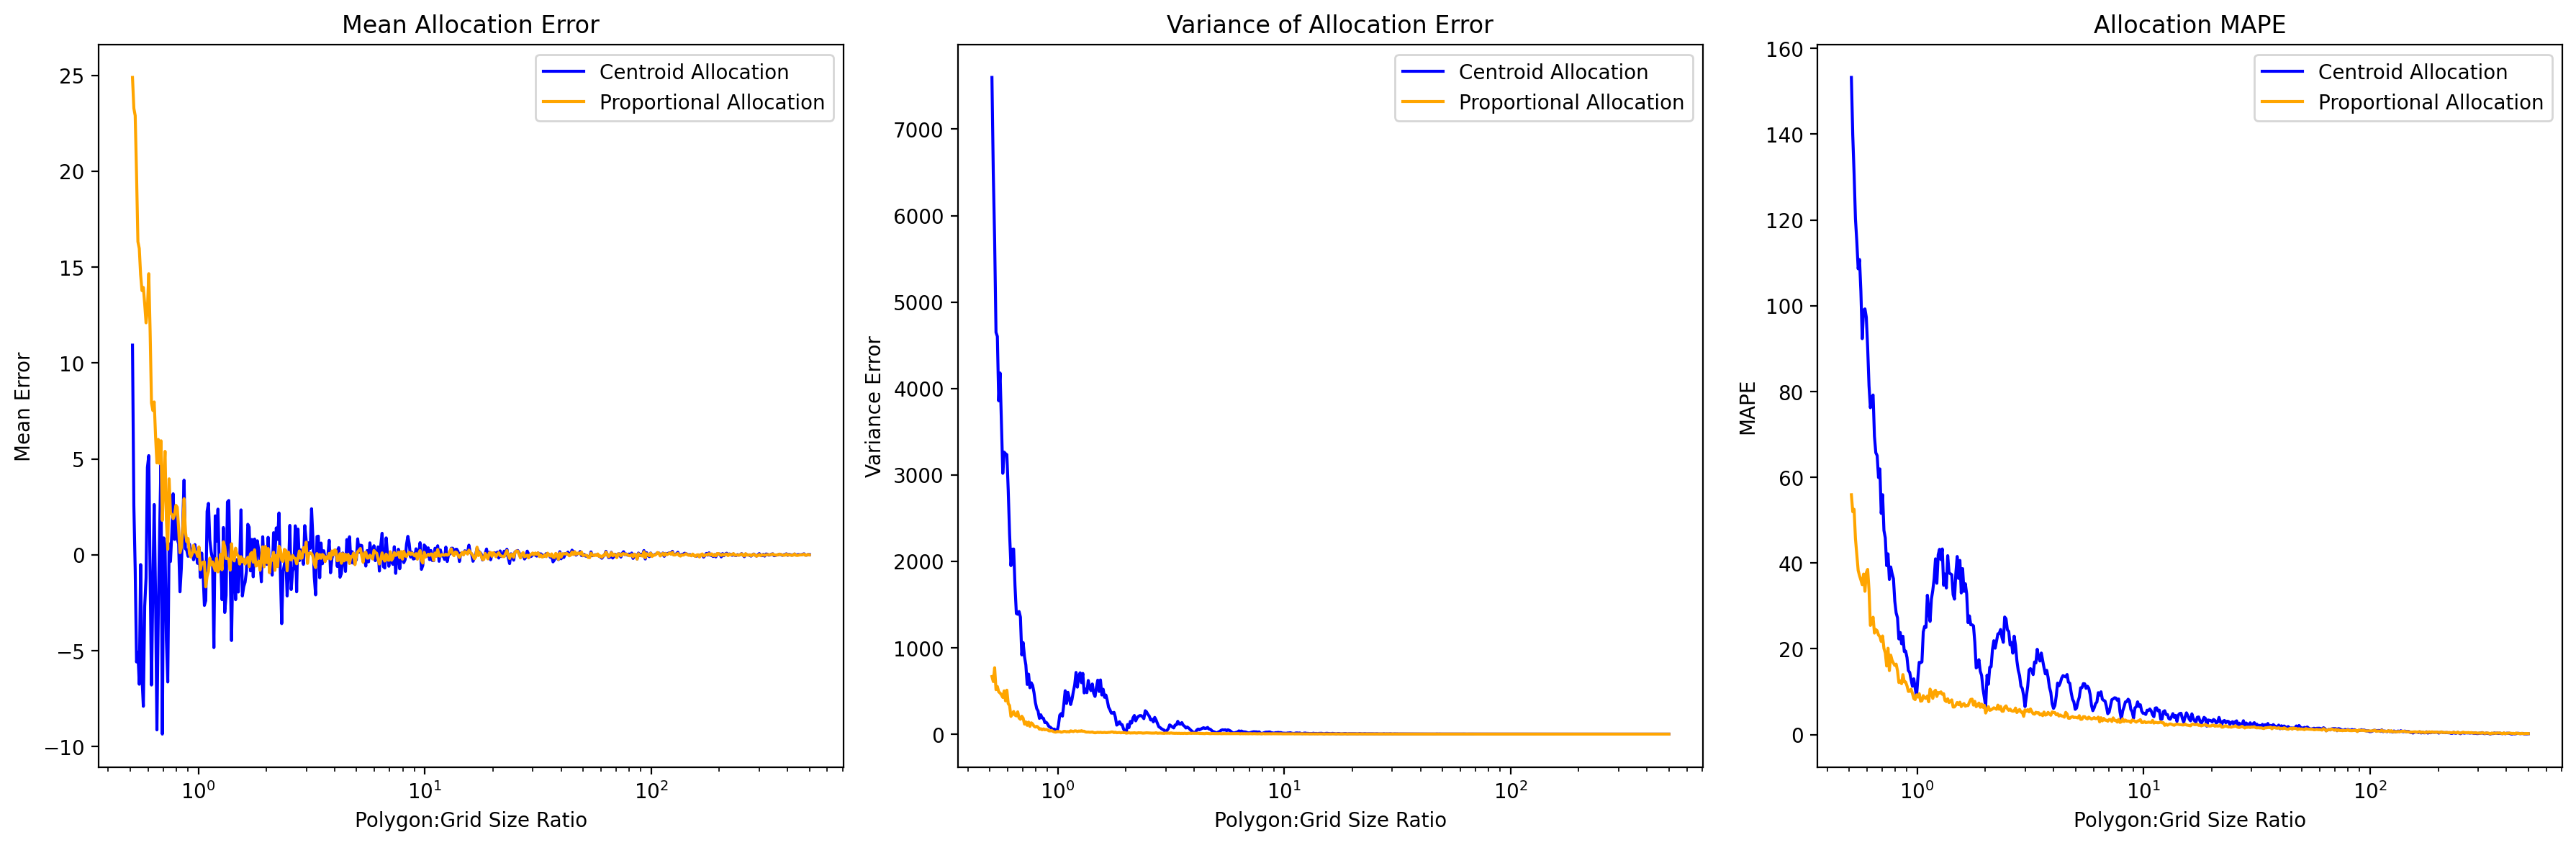

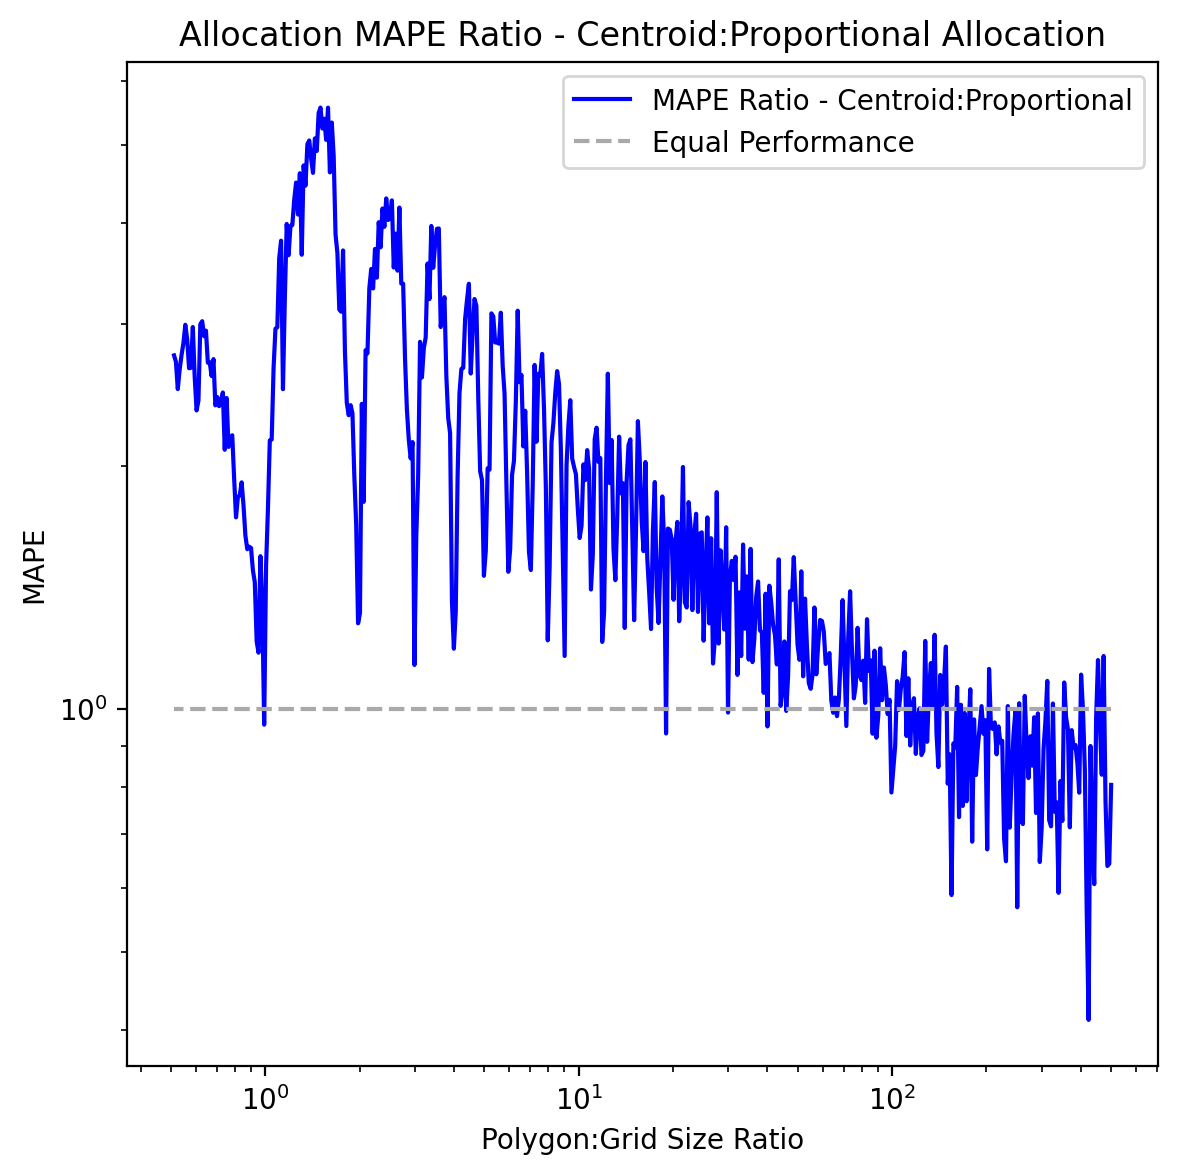

In [10]:
trials = 100
x_range = (-1,1)
y_range = (-1,1)
results_random_polygon_start = run_simulation_random_polygon_placement_2d(rate, x_range, y_range, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_random_polygon_start)
plot_simulation_results_ratio(dg, dp, results_random_polygon_start)
plot_simulation_error_ratios(dg, dp, results_random_polygon_start)

## Vary the polygon and the grid origin

100%|██████████| 500/500 [02:34<00:00,  3.24it/s]


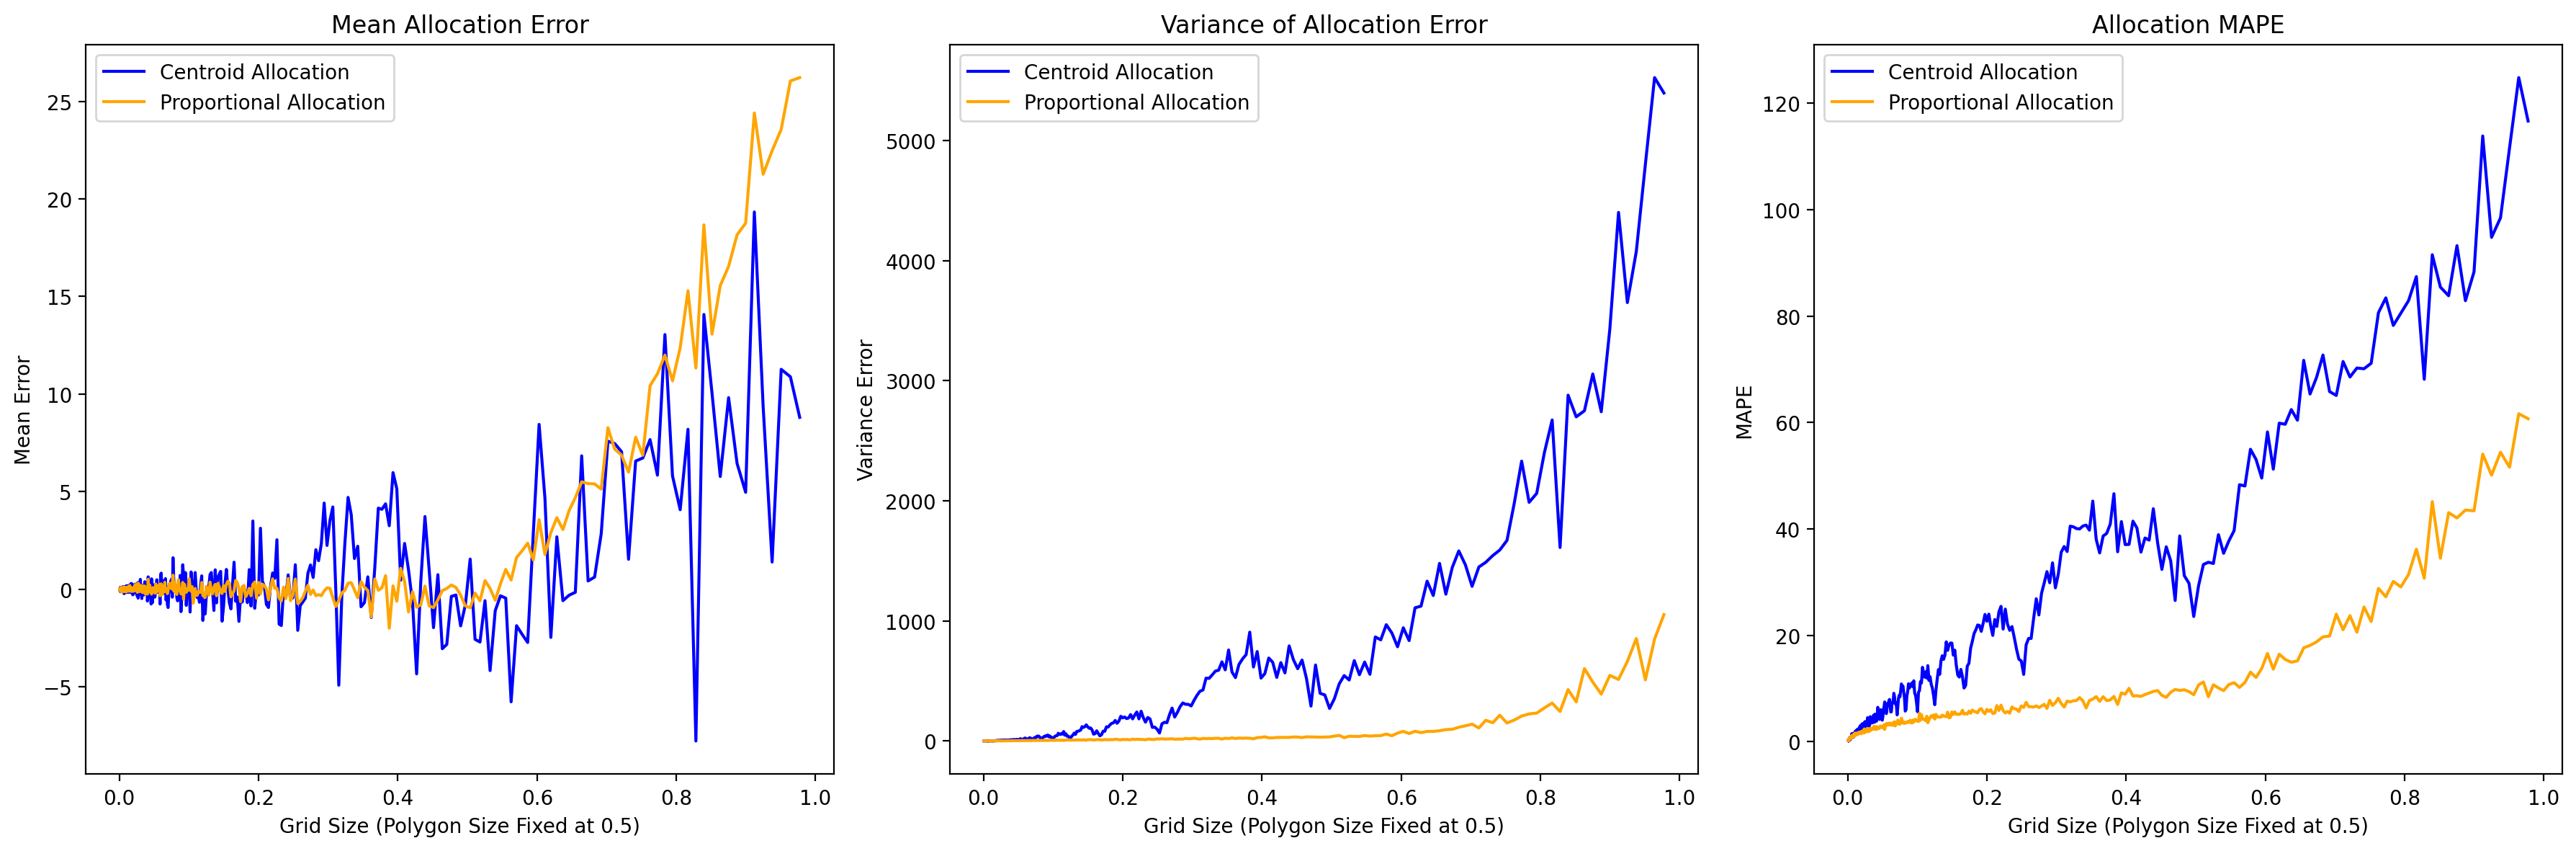

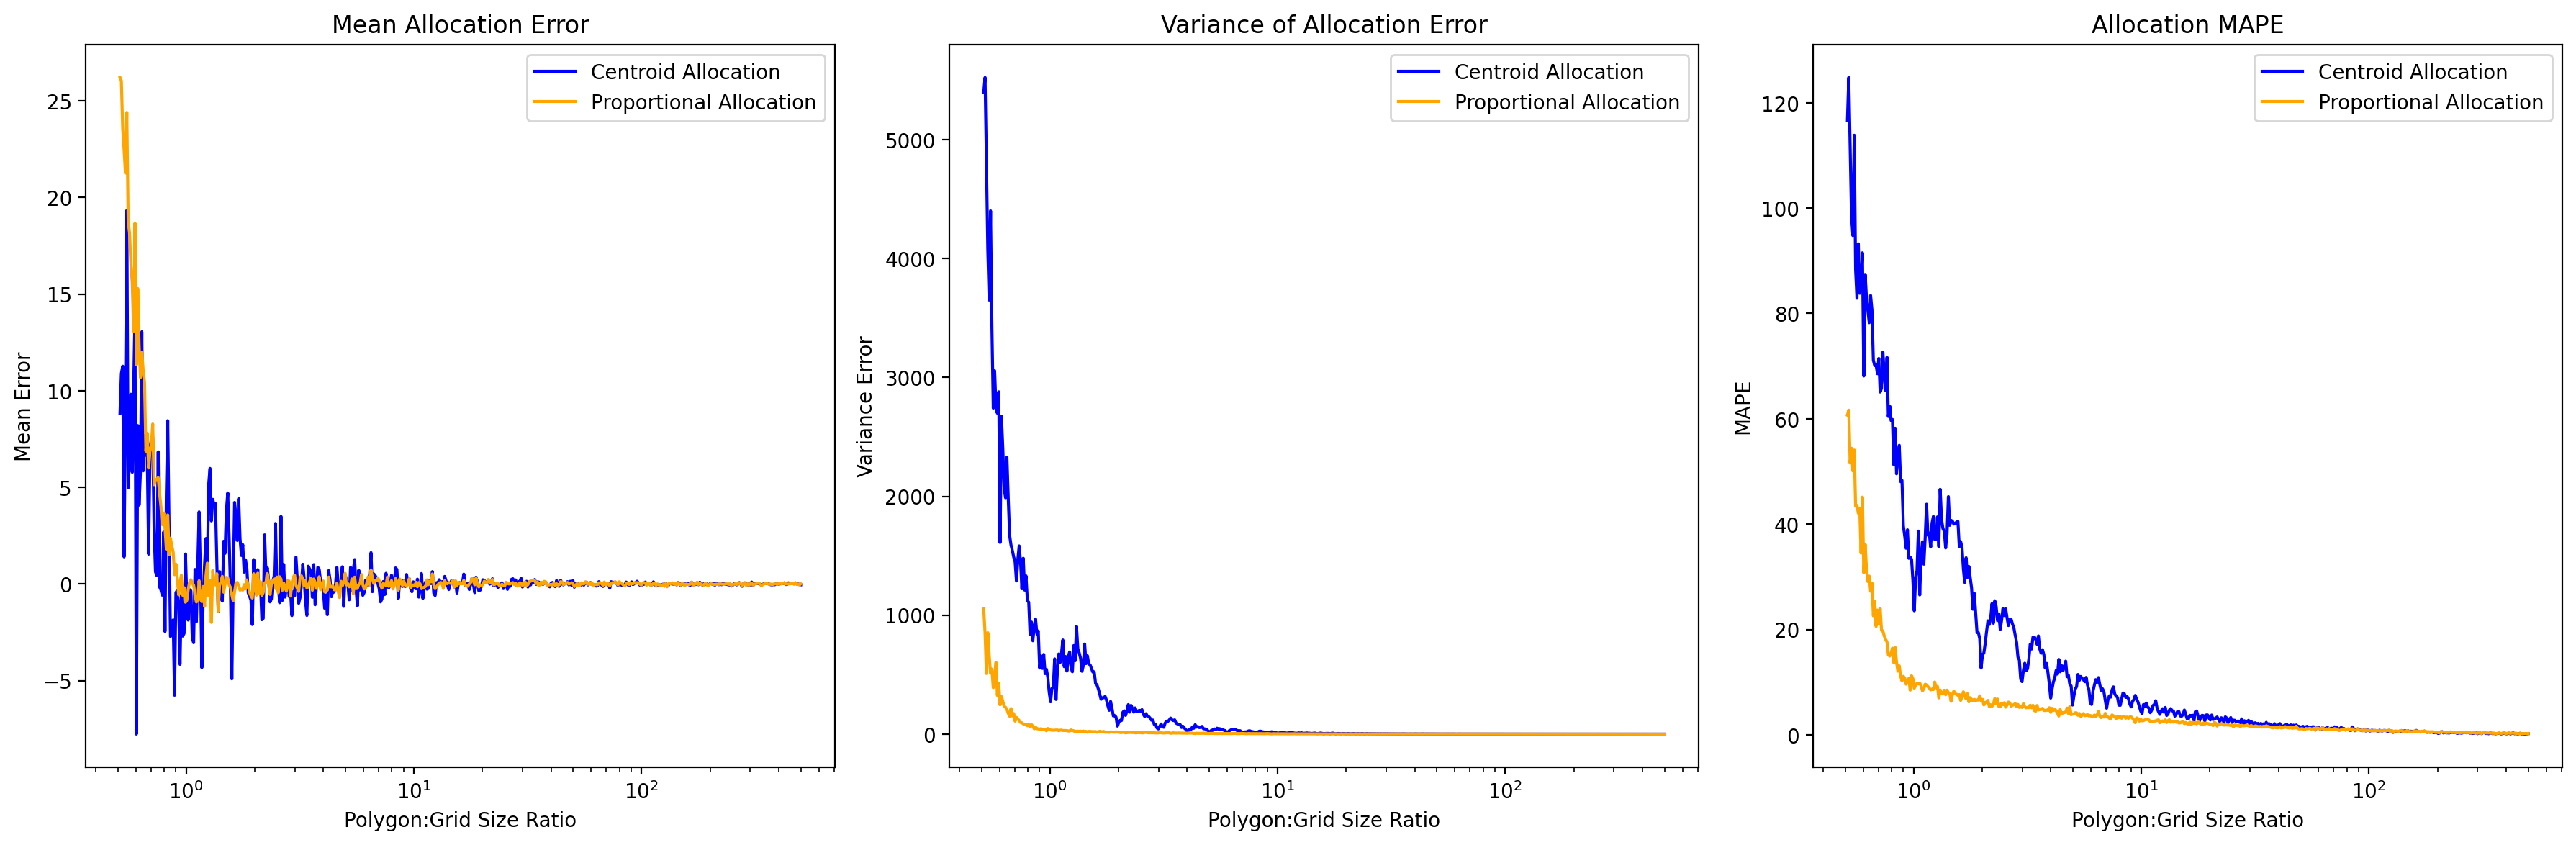

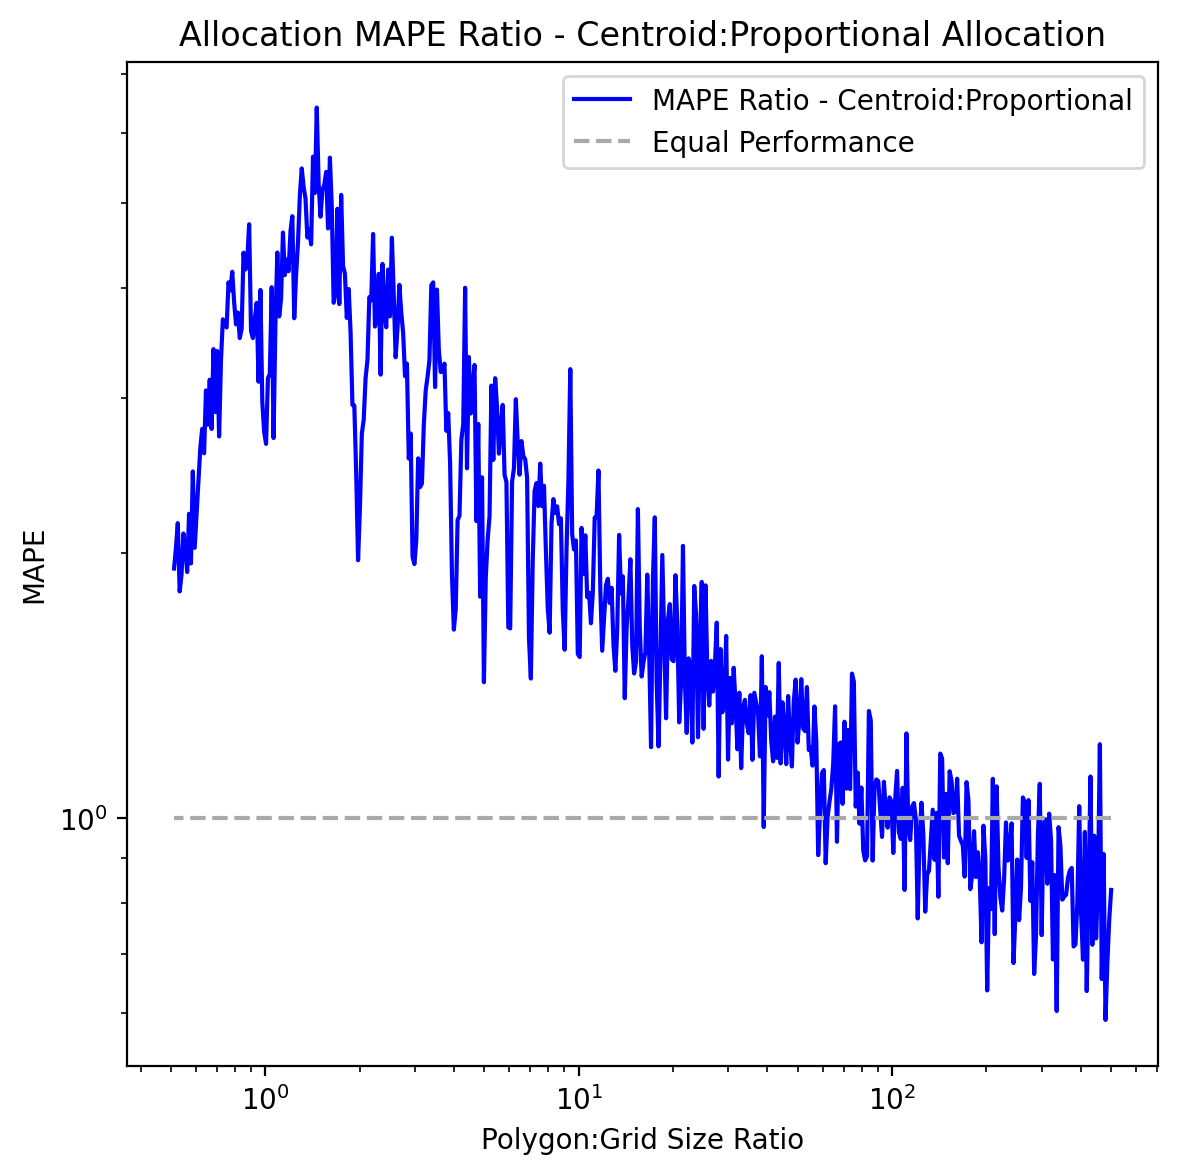

In [11]:
trials = 100
x_range = (-1,2)
y_range = (-1,2)
results_random_polygon_start_and_origin = run_simulation_random_polygon_placement_and_grid_origin_2d(rate, x_range, y_range, trials, dg, dp, point_process)
plot_simulation_results(dg, dp, results_random_polygon_start_and_origin)
plot_simulation_results_ratio(dg, dp, results_random_polygon_start_and_origin)
plot_simulation_error_ratios(dg, dp, results_random_polygon_start_and_origin)

## Compare the results of the centroid and proportional allocation approaches for each point process

100%|██████████| 500/500 [15:46<00:00,  1.89s/it] 


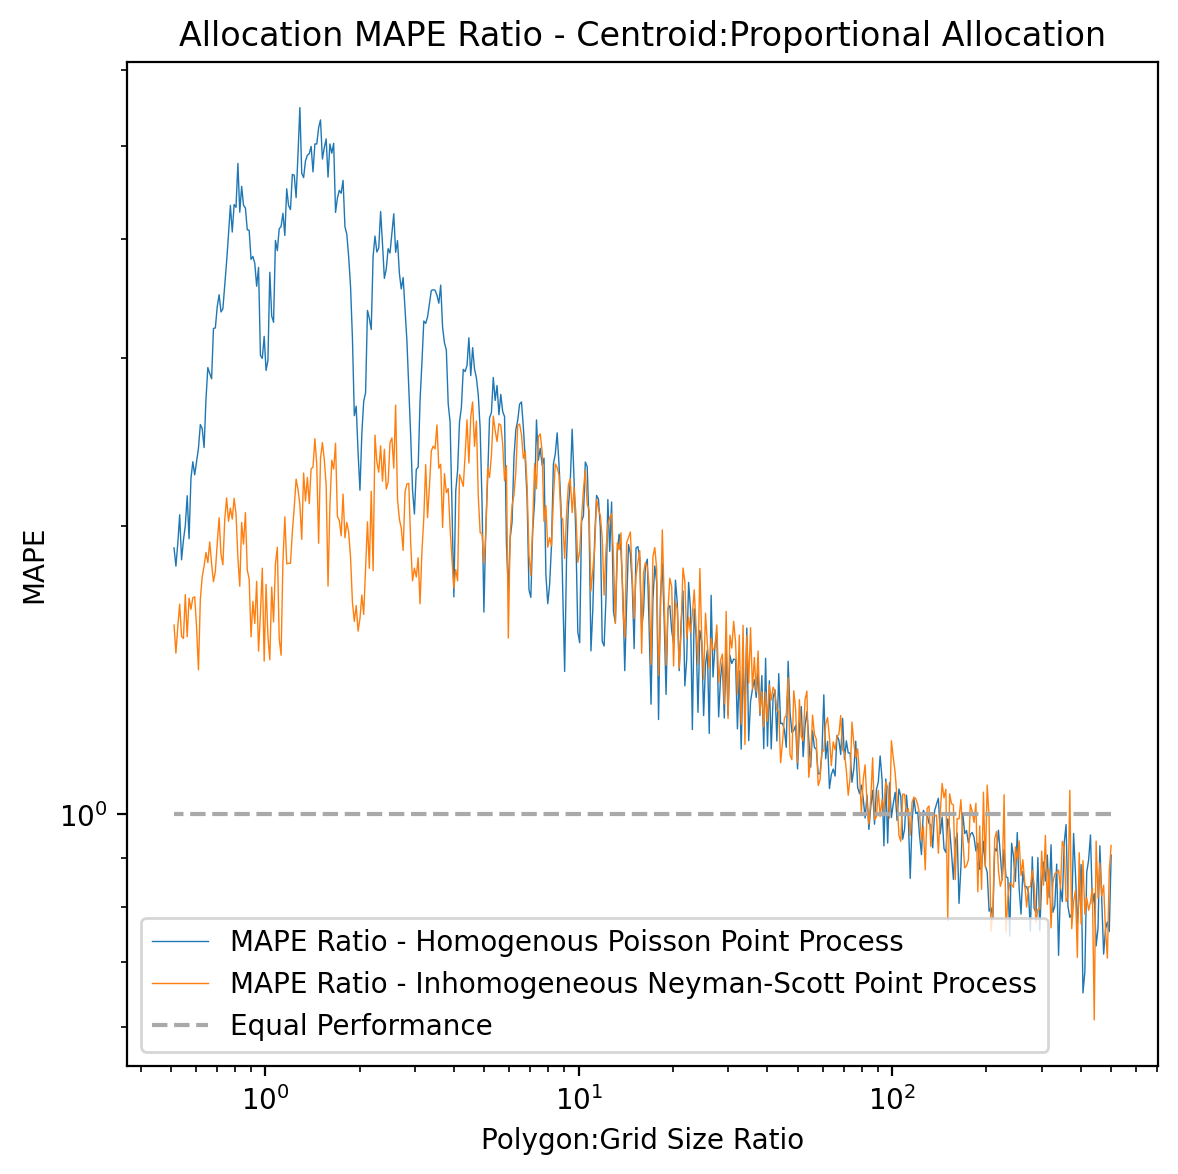

In [ ]:
trials = 500
x_range = (-1,2)
y_range = (-1,2)
point_process_poisson = sample_generator['poisson']
point_process_neyman = sample_generator['neyman-scott']
# point_process_lgcp = sample_generator['lgcp']
results_poisson = run_simulation_random_polygon_placement_and_grid_origin_2d(rate, x_range, y_range, trials, dg, dp, point_process_poisson)
results_neyman = run_simulation_random_polygon_placement_and_grid_origin_2d(rate, x_range, y_range, trials, dg, dp, point_process_neyman)
# results_lgcp = run_simulation_random_polygon_placement_and_grid_origin_2d(rate, x_range, y_range, trials, dg, dp, point_process_lgcp)
results = [results_poisson, results_neyman]
names = ['Homogenous Poisson Point Process', 'Inhomogeneous Neyman-Scott Point Process']
# results = [results_poisson, results_neyman, results_lgcp]
# names = ['Homogenous Poisson Point Process', 'Inhomogeneous Neyman-Scott Point Process', 'Inhomogeneous Log-Gaussian Cox Point Process']

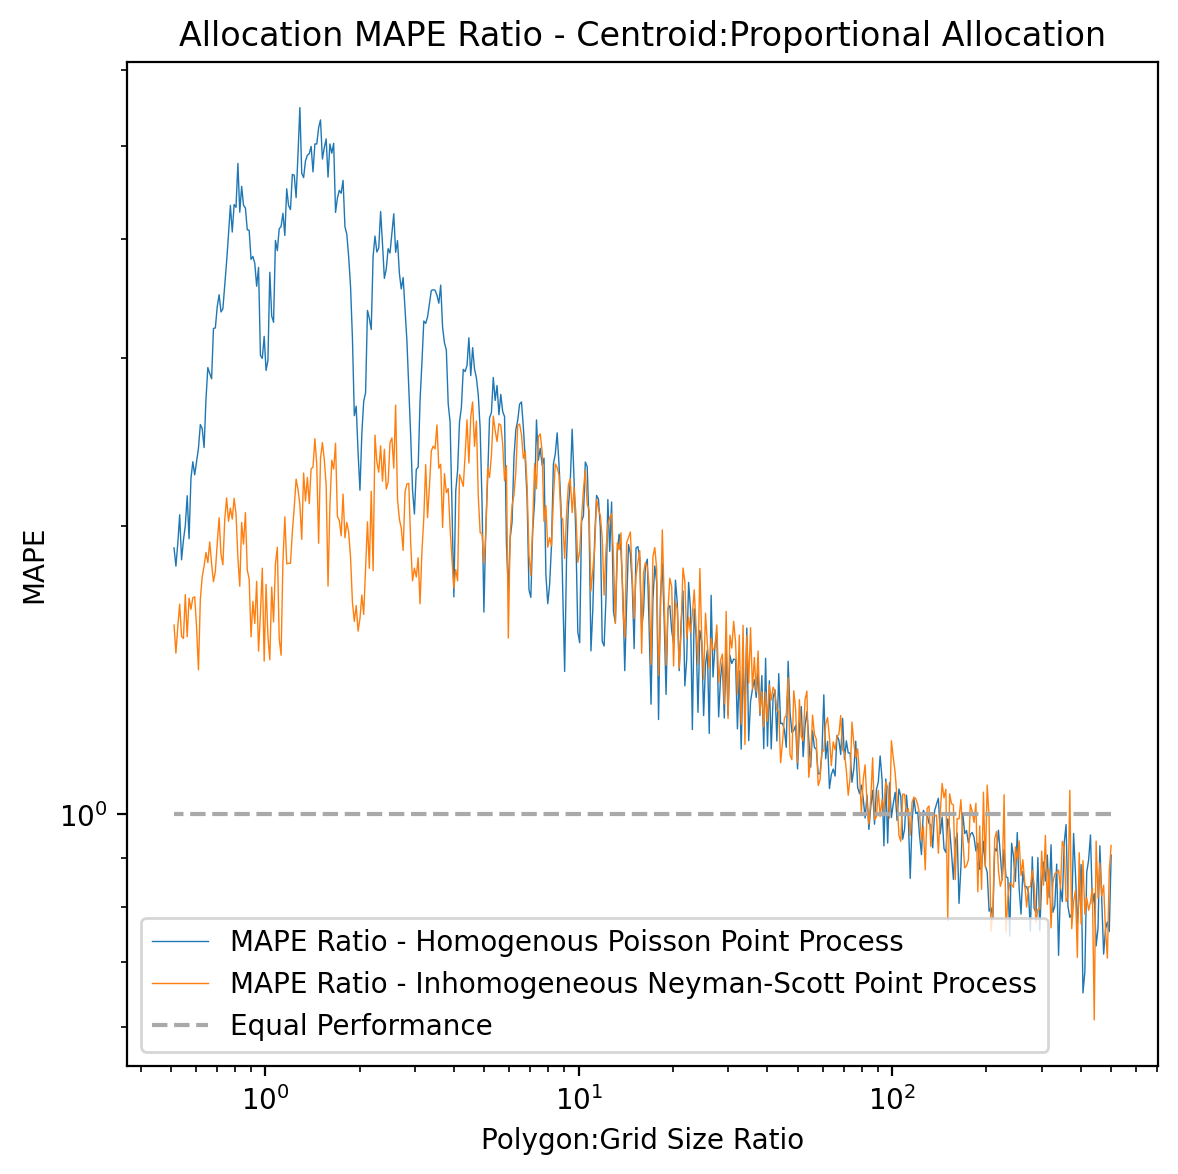

In [21]:
plot_simulation_error_ratios_multiple(dg, dp, results, names)

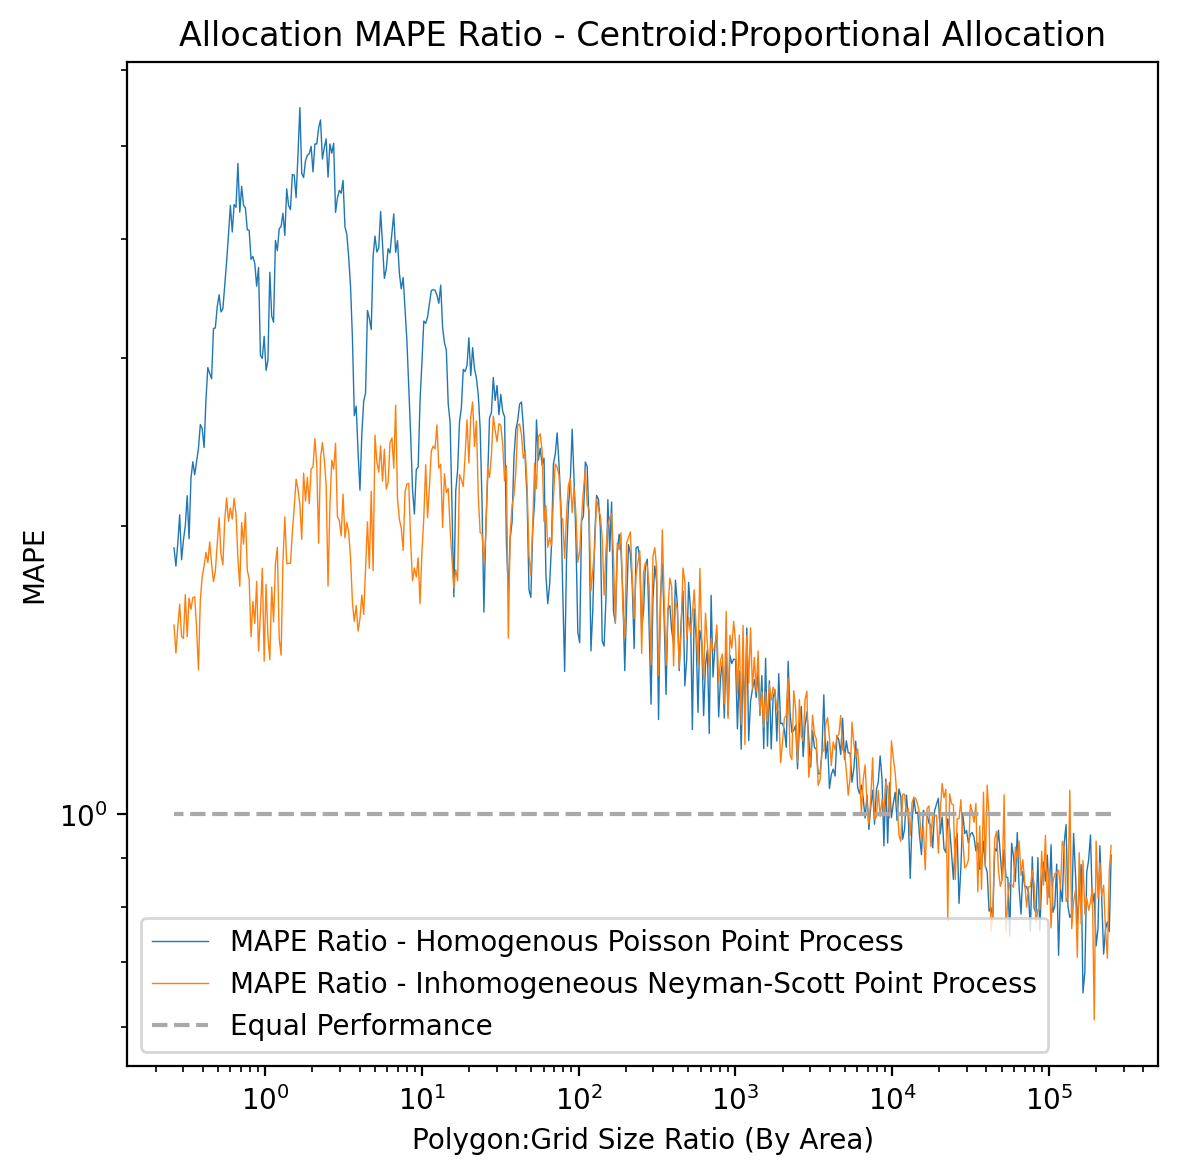

In [22]:
plot_simulation_error_ratios_multiple_2d(dg, dp, results, names)